In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [2]:
# Load data
matrix = []

with open("spambase.data", "r") as raw_data:
    for raw_line in raw_data:
        line = [float(x) for x in raw_line.split(",")]
        matrix.append(line)

data = pd.DataFrame(matrix)
row, col = data.shape
X, y = data.iloc[:,:col - 1], data[col - 1]
y = y.astype(bool)

# Question 1: Logistic Regression

## Data spliting and training

We will use a custom function from sklearn to split data into train and test set, and stratify the data based on the labels

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

We will verify the size of the train_set to contain 39.4% of spam positive emails

In [4]:
len([x for x in y_train if x == 1.0]) / len(y_train)

0.3939130434782609

In [5]:
# Training data on logistic regression

logReg = LogisticRegression()
logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
# data on the testing set

test_data = logReg.predict(X_test)

print("Confusion matrix\n", confusion_matrix(test_data, y_test), "\n")

tn, fp, fn, tp = confusion_matrix(test_data, y_test).ravel()
print("True negative:", tn, ", false positive:", fp, ", false negative:", fn, ",true positive:", tp, "\n")

print("Accuracy score", accuracy_score(test_data, y_test), "\n")

print("Precision", precision_score(test_data, y_test), "\n")

print("Recall", recall_score(test_data, y_test), "\n")

print("F1 score", f1_score(test_data, y_test), "\n")

Confusion matrix
 [[664  59]
 [ 33 395]] 

True negative: 664 , false positive: 59 , false negative: 33 ,true positive: 395 

Accuracy score 0.9200695047784535 

Precision 0.8700440528634361 

Recall 0.9228971962616822 

F1 score 0.8956916099773243 



## Feature coefficients

In [7]:
coef = logReg.coef_
print(coef)

[[-3.03683242e-01 -1.61522815e-01  2.04203936e-01  8.87138383e-01
   6.17357392e-01  1.06316836e+00  2.19249313e+00  4.48460468e-01
   5.49221571e-01  6.95590664e-02 -6.60141639e-02 -2.12340419e-01
  -1.48393848e-01  6.73040431e-03  1.12310643e+00  9.21571200e-01
   8.86995753e-01  1.53143749e-01  6.38798671e-02  8.27577792e-01
   2.18436122e-01  2.65090794e-01  2.20527694e+00  8.59427755e-01
  -1.62665888e+00 -1.01611620e+00 -3.44547056e+00  3.22973411e-01
  -1.25024066e+00 -5.87204971e-01 -2.73571008e-01 -6.06811149e-02
  -8.59757292e-01 -1.71938312e-02 -9.42368979e-01  7.04687263e-01
  -4.53200082e-03 -4.55611073e-01 -6.84271070e-01 -3.23792795e-01
  -1.34508133e+00 -1.45759617e+00 -6.93468343e-01 -1.37481434e+00
  -6.98280319e-01 -1.47478543e+00 -9.76451686e-01 -1.28310935e+00
  -1.09643213e+00 -2.46950673e-01 -5.01702531e-01  2.87343630e-01
   3.20432095e+00  1.03634952e+00 -1.02859385e-02  6.64745003e-03
   6.37587807e-04]]


In [8]:
feature_sort = sorted(X_train.columns, key=lambda x: -coef.reshape(-1, 1)[x])

In [9]:
feature_sort[0], feature_sort[-1]

(52, 26)

Feature number 52 is contributing the most to the classification of spam email. According to the NAMES database, this feature is the character "$". Feature number 26 is contributing less to the classification of spam email, which is the word "hpl".

## Varying threshold 

In [10]:
proba = logReg.predict_proba(X_test)
logReg.classes_

array([False,  True])

In [11]:
def get_prediction(T, proba):
    result = []
    for pred in proba:
        if pred[0] > T:
            result.append(False)
        else:
            result.append(True)
    return result

def get_accuracy(a1, a2):
    assert len(a1) == len(a2)
    diff = 0
    for i in range(len(a1)):
        if a1[i] != a2[i]:
            diff += 1
            
    return 1 - diff/len(a1)

In [12]:
ori = logReg.predict(X_test)
test_labels = np.array(y_test)

In [13]:
# Test accuracy on T = 0.5

Tpoint5 = get_prediction(0.5, proba)
get_accuracy(Tpoint5, test_labels)

0.9200695047784535

In [14]:
# Accuracy on each point of the threshold
acc = []
thres = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for T in thres:
    pred = get_prediction(T, proba)
    a = get_accuracy(pred, test_labels)
    
    print("Accuracy on threshold T=", T, "is: ", a)
    acc.append(a)

Accuracy on threshold T= 0.1 is:  0.8297132927888793
Accuracy on threshold T= 0.2 is:  0.8740225890529973
Accuracy on threshold T= 0.3 is:  0.894005212858384
Accuracy on threshold T= 0.4 is:  0.9079061685490878
Accuracy on threshold T= 0.5 is:  0.9200695047784535
Accuracy on threshold T= 0.6 is:  0.9244135534317984
Accuracy on threshold T= 0.7 is:  0.9122502172024327
Accuracy on threshold T= 0.8 is:  0.8688097306689835
Accuracy on threshold T= 0.9 is:  0.8132059079061685


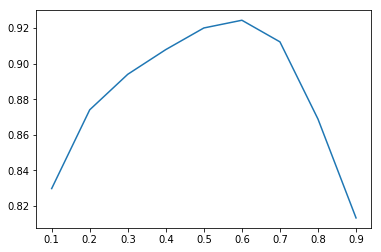

In [15]:
 # Plotting graph on accuracy and T
plt.plot(thres, acc)

# Question 2: Classifiers comparison

We will reuse the splitted dataset as Question 1. Logistic regression is trained in question 1, so we will continue with kNN, LDA and decision tree.

In [16]:
def get_training_score(model):
    model.fit(X_train, y_train)
    # accuracy 
    accuracy = model.score(X_test, y_test)
    error = 1 - accuracy
    
    print("Accuracy:", accuracy, "error:", error)

## Experimenting kNN and 4 classifiers

In [17]:
lda = LinearDiscriminantAnalysis()
knn = KNeighborsClassifier(n_neighbors=7)
decTree = DecisionTreeClassifier()

Accuracy report on LDA

In [18]:
get_training_score(lda)

Accuracy: 0.8818418766290183 error: 0.11815812337098175


Accuracy report on KNN

In [19]:
neighbors = [2, 3, 4, 5, 6, 7, 9]
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    get_training_score(knn)

Accuracy: 0.789748045178106 error: 0.21025195482189396
Accuracy: 0.8114682884448305 error: 0.18853171155516946
Accuracy: 0.7949609035621199 error: 0.2050390964378801
Accuracy: 0.792354474370113 error: 0.20764552562988703
Accuracy: 0.7949609035621199 error: 0.2050390964378801
Accuracy: 0.789748045178106 error: 0.21025195482189396
Accuracy: 0.7784535186794093 error: 0.22154648132059074


On the number of neighbors, k = 3 returns the highest accuracy (80%) and lowest error (20%).

Accuracy report on decision tree

In [20]:
get_training_score(decTree)

Accuracy: 0.9035621198957429 error: 0.09643788010425713


Accuracy report on logistic regression

In [21]:
get_training_score(logReg)

Accuracy: 0.9200695047784535 error: 0.0799304952215465


## ROC curve and AUC

This piece of code is referenced from sklearn's own page [here](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html)

In [22]:
def draw_roc(model):
    y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

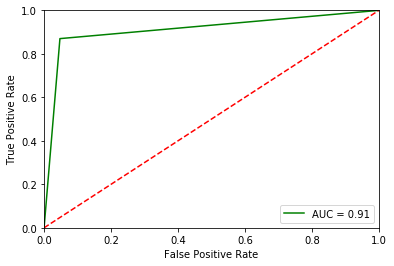

In [23]:
draw_roc(logReg)

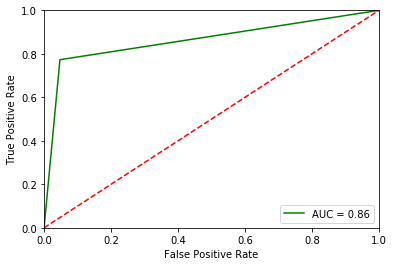

In [24]:
draw_roc(lda)

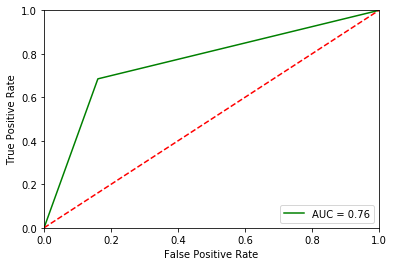

In [25]:
draw_roc(knn)

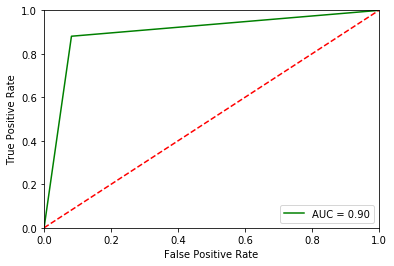

In [26]:
draw_roc(decTree)

# Question 3: kNN

The euclidean distance can be calculated using `numpy.linalg.norm` function on the subtraction of 2 vectors

In [27]:
import heapq

class BinaryKNNClassifier:
    def __init__(self, labels=[False, True], n_neighbors=5):
        self.labels = labels
        self.n_neighbors = n_neighbors
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def euclideanDistance(self, p1, p2):
        return np.linalg.norm(p1 - p2)
    
    def predict_instance_proba(self, test):
        distances = []
        heapq.heapify(distances)

        for idx, train in self.X.iterrows():
            dist = self.euclideanDistance(test, train)
            if len(distances) < self.n_neighbors:
                heapq.heappush(distances, (-dist, self.y.loc[idx]))
            elif distances[0][0] <= -dist:
                heapq.heapreplace(distances, (-dist, self.y.loc[idx]))


        r = [0] * len(self.labels)
        for n in distances:
            r[n[1]] += 1
        return [x * 1.0/self.n_neighbors for x in r]
    
    def predict_all_proba(self, test_set):
        result = []
        for i, test in test_set.iterrows():
            result.append(self.predict_instance_proba(test))
        return result
    
    def predict(self, test_set):
        predict_proba = self.predict_all_proba(test_set)
        result = []
        for pred in predict_proba:
            if pred[0] > pred[1]:
                result.append(False)
            else:
                result.append(True)
        return result

In [28]:
# Testing
knnBinary = BinaryKNNClassifier(n_neighbors=5)

In [29]:
knnBinary.fit(X_train, y_train)
pred = knnBinary.predict(X_test[:100])

/home/hoang/Documents/school/4400/env/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
sklearn_pred = knn.predict(X_test[:100])

In [31]:
get_accuracy(pred, sklearn_pred)

1.0

The reason I only tested with 100 instances of the test set is that kNN is too slow if running with only one thread. The complexity to calculate the neighbor of 1 test instance is `O(sizeof(train) * sizeof(features)`. This training set has 57 features and approximately 4000 training instances. Hence, it took quite a while to get the entire dataset. On 100 instances, the accuracy of my implementation is the same as sklearn's implementation, and the accuracy of the `predict_proba` is the same either:

In [32]:
pred_proba = knnBinary.predict_all_proba(X_test[:100])
sklearn_pred_proba = knn.predict_proba(X_test[:100])

/home/hoang/Documents/school/4400/env/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


In [33]:
diff = 0
for i in range(len(pred_proba)):
    my = pred_proba[i]
    sk = sklearn_pred_proba[i]
    if my[0] != sk[0] and my[1] != sk[1]:
        diff += 1

print(diff)

0


Accuracy score of my own implementations (100 instances) compare to sklearn's accuracy

In [34]:
get_accuracy(pred, np.array(y_test[:100]))

0.81

In [35]:
get_accuracy(sklearn_pred, np.array(y_test[:100]))

0.81

# Question 4

In [36]:
class KFoldCrossValidation:
    def __init__(self, model, labels=[0, 1], k=5):
        self.model = model
        self.labels = labels
        self.k = k
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def cross_validation(self, data_folds):
        score = []

        for i in range(self.k):
            train_test, label_test = data_folds[i]
            
            for j in range(self.k):
                train_data, label = data_folds[j]
                self.model.fit(train_data, label)
                s = self.model.score(train_test, label_test)

                score.append(s)
        
        return score
    
    def kfold(self):
        size = int(self.X.shape[0] / self.k)

        i = 0
        result = []
        data_folds = []
        
        while i <= self.X.shape[0] - size:
            fold_i = self.X[i : i + size]
            label_i = self.y[i : i + size]
            data_folds.append((fold_i, label_i))
            i += size
            
        score = self.cross_validation(data_folds)
        return np.average(score)

In [37]:
def get_avg_sklearn_CV(model, cv, X, y):
    return np.average(cross_val_score(X=X, y=y, cv=cv, estimator=model))

In [38]:
k_folds = [5, 10, 20]

for k in k_folds:
    model = LogisticRegression()
    kfc = KFoldCrossValidation(model=model, k=k)
    kfc.fit(X_train, y_train)
    print("Average CV with k=", k, "for logistic regression", kfc.kfold())
    print("sklearn CV for logistic regression", get_avg_sklearn_CV(model, k, X_train, y_train))
    print("----------------------------")

Average CV with k= 5 for logistic regression 0.9204637681159421
sklearn CV for logistic regression 0.9281062186828699
----------------------------
Average CV with k= 10 for logistic regression 0.9095072463768116
sklearn CV for logistic regression 0.9292684997399137
----------------------------
Average CV with k= 20 for logistic regression 0.8995784883720931
sklearn CV for logistic regression 0.9280964613554767
----------------------------


In [39]:
for k in k_folds:
    model = LinearDiscriminantAnalysis()
    kfc = KFoldCrossValidation(model=model, k=k)
    kfc.fit(X_train, y_train)
    print("Average CV with k=", k, "for LDA", kfc.kfold())
    print("sklearn CV for logistic regression", get_avg_sklearn_CV(model, k, X_train, y_train))

/home/hoang/Documents/school/4400/env/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Average CV with k= 5 for LDA 0.8839420289855073
sklearn CV for logistic regression 0.8881124851910138


/home/hoang/Documents/school/4400/env/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Average CV with k= 10 for LDA 0.8783478260869565
sklearn CV for logistic regression 0.8878225119863782


/home/hoang/Documents/school/4400/env/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Average CV with k= 20 for LDA 0.850203488372093
sklearn CV for logistic regression 0.8854999512605055


With the result above, Logistic regression generally performs better than LDA for this specific dataset